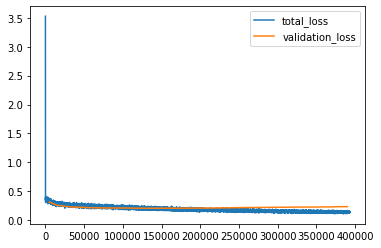

iter :  129999 val_loss ;  0.20687928473554046


In [1]:
import json
import matplotlib.pyplot as plt

TRIALNUMBER = 44
# experiment_folder = f'/home1/yjun/detectron2/Basic_trial{TRIALNUMBER}/'
experiment_folder = f'/nas1/yjun/detectron2/saved_model/train_trial{TRIALNUMBER}/'

def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')
#print(experiment_metrics)
#print(experiment_metrics[4999]['iteration'])
# plt.ylim(0.15, 0.3)
# plt.xlim(right=40000)
plt.plot(
    [x['iteration'] for x in experiment_metrics if 'total_loss' in x], 
    [x['total_loss'] for x in experiment_metrics if 'total_loss' in x])
plt.plot(
    [x['iteration'] for x in experiment_metrics if 'validation_loss' in x], 
    [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x])
plt.legend(['total_loss', 'validation_loss'], loc='upper right')

plt.show()

val_loss_list = [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x]
iter_list = [x['iteration'] for x in experiment_metrics if 'validation_loss' in x]
min_val_loss = min([x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x])
min_val_loss_idx = val_loss_list.index(min_val_loss)
print('iter : ', iter_list[min_val_loss_idx], 'val_loss ; ', min_val_loss) # 9299 9399

iter :  179999 / max ap :  48.75199734122578
iter :  174999 / max ap50 :  83.25273454923477
category #: 22
iter : , 179999 , Ps_StDent_Single ,maxbbox : , 32.710539703619176
iter : , 289999 , Ps_DullMark ,maxbbox : , 56.85223485555214
iter : , 174999 , BlackLine ,maxbbox : , 62.077837520479115
iter : , 374999 , DirtyScab ,maxbbox : , 39.35423089293669
iter : , 224999 , LineScab ,maxbbox : , 60.72975529797905
iter : , 229999 , Scrape ,maxbbox : , 51.95895649479281
iter : , 124999 , Machalhum ,maxbbox : , 35.93737286225529
iter : , 264999 , Dent ,maxbbox : , 55.462046204620464
iter : , 294999 , Scratch ,maxbbox : , 69.1729069104752
iter : , 314999 , PinchTree ,maxbbox : , 72.2771581682442
iter : , 324999 , OilDrop ,maxbbox : , 57.544182770781916
iter : , 209999 , Dirty ,maxbbox : , 52.997898655454335
iter : , 179999 , EdgeCrack ,maxbbox : , 48.29207920792079
iter : , 294999 , Hole ,maxbbox : , 45.258525852585265
iter : , 284999 , WeldHole ,maxbbox : , 80.01636168382564
iter : , 379999 , 

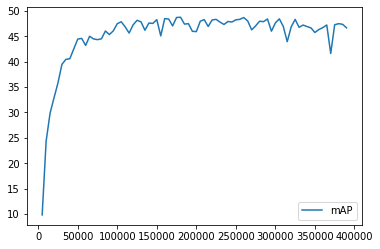

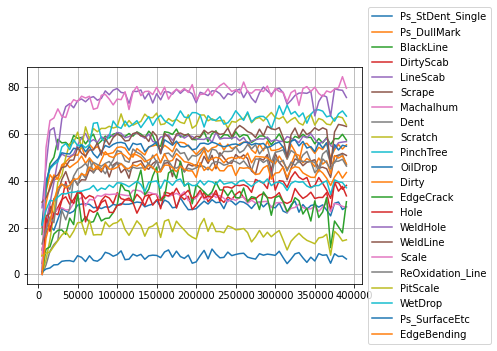

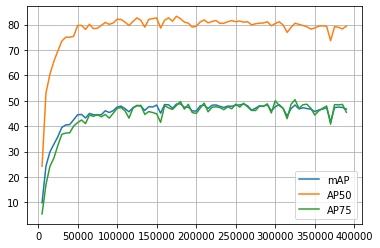

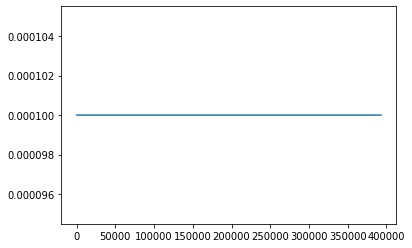

In [2]:
import json
import matplotlib.pyplot as plt

def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')
# print(experiment_metrics[249].keys())
iteration = [x['iteration'] for x in experiment_metrics]
plt.figure()
plt.plot(
    [x['iteration'] for x in experiment_metrics if 'bbox/AP' in x], 
    [x['bbox/AP'] for x in experiment_metrics if 'bbox/AP' in x])

iters = [x['iteration'] for x in experiment_metrics if 'bbox/AP' in x]
ap50s = [x['bbox/AP50'] for x in experiment_metrics if 'bbox/AP50' in x]
aps = [x['bbox/AP'] for x in experiment_metrics if 'bbox/AP' in x]
maxap50 = max(ap50s)
maxid50 = ap50s.index(maxap50)

maxap = max(aps)
maxid = aps.index(maxap)

print('iter : ', iters[maxid], '/ max ap : ', maxap)

print('iter : ', iters[maxid50], '/ max ap50 : ', maxap50)
# plt.xlim(0,35000)
# plt.ylim(0,55)
plt.legend(['mAP'], loc='lower right')
plt.figure()


# category 13
category_list = [
    'Ps_StDent_Single', 'BlackLine', 'DirtyScab', 'LineScab', 'Scratch', 'PinchTree',
    'OilDrop', 'Dirty', 'EdgeCrack', 'Hole', 'ReOxidation_Line', 'PitScale', 'etc'
]
# category 22
for x in experiment_metrics:
    if 'bbox/AP-Ps_DullMark' in x:
        category_list = [
        'Ps_StDent_Single', 'Ps_DullMark', 'BlackLine', 'DirtyScab', 'LineScab', 'Scrape','Machalhum', 
        'Dent', 'Scratch', 'PinchTree', 'OilDrop', 'Dirty', 'EdgeCrack', 'Hole', 'WeldHole', 'WeldLine', 
        'Scale', 'ReOxidation_Line', 'PitScale', 'WetDrop','Ps_SurfaceEtc', 'EdgeBending'
        ]
        break
print(f'category #: {len(category_list)}')

for category in category_list:
    iters = [x['iteration'] for x in experiment_metrics if 'bbox/AP-' + category in x]
    bboxes = [x['bbox/AP-' + category] for x in experiment_metrics if 'bbox/AP-' + category in x]
    maxbbox = max(bboxes)
    maxid = bboxes.index(maxbbox)
    print('iter : ,', iters[maxid], ',', category, ',maxbbox : ,', maxbbox)
    plt.plot(
        [x['iteration'] for x in experiment_metrics if 'bbox/AP-' + category in x], 
        [x['bbox/AP-' + category] for x in experiment_metrics if 'bbox/AP-' + category in x])

plt.grid()
# plt.xlim(0,35000)
# plt.ylim(0,50)
plt.legend(category_list, loc='center right', bbox_to_anchor=(1.4,0.5))
plt.figure()




# plt.xlim(0,500000)
plt.plot(
    [x['iteration'] for x in experiment_metrics if 'bbox/AP' in x], 
    [x['bbox/AP'] for x in experiment_metrics if 'bbox/AP' in x])
plt.plot(
    [x['iteration'] for x in experiment_metrics if 'bbox/AP50' in x], 
    [x['bbox/AP50'] for x in experiment_metrics if 'bbox/AP50' in x])
plt.plot(
    [x['iteration'] for x in experiment_metrics if 'bbox/AP75' in x], 
    [x['bbox/AP75'] for x in experiment_metrics if 'bbox/AP75' in x])
plt.grid()
# plt.xlim(0,35000)
# plt.ylim(0,65)
plt.legend(['mAP', 'AP50', 'AP75'], loc='lower right')

plt.figure()
# plt.xlim(0,500000)

plt.plot(
    [x['iteration'] for x in experiment_metrics if 'lr' in x], 
    [x['lr'] for x in experiment_metrics if 'lr' in x])

iter :  189999 / max class accuracy :  0.990234375
iter :  390979 / max fg class accuracy :  0.9088081588081588


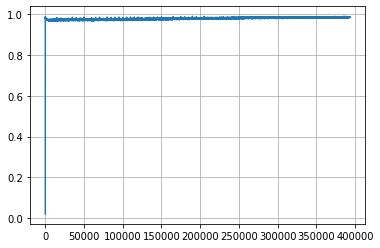

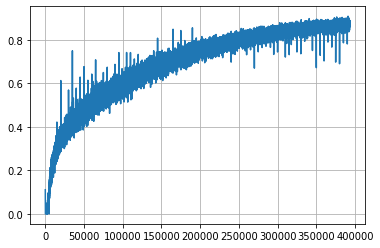

In [3]:
import json
import matplotlib.pyplot as plt

def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')
# print(experiment_metrics[249].keys())
iteration = [x['iteration'] for x in experiment_metrics]

plt.figure()
plt.plot(
    [x['iteration'] for x in experiment_metrics if 'fast_rcnn/cls_accuracy' in x], 
    [x['fast_rcnn/cls_accuracy'] for x in experiment_metrics if 'fast_rcnn/cls_accuracy' in x])
plt.grid()
# plt.ylim(0,50)

plt.figure()
plt.plot(
    [x['iteration'] for x in experiment_metrics if 'fast_rcnn/fg_cls_accuracy' in x], 
    [x['fast_rcnn/fg_cls_accuracy'] for x in experiment_metrics if 'fast_rcnn/fg_cls_accuracy' in x])
plt.grid()
# plt.ylim(0,50)

iters = [x['iteration'] for x in experiment_metrics if 'fast_rcnn/cls_accuracy' in x]
cls_acc = [x['fast_rcnn/cls_accuracy'] for x in experiment_metrics if 'fast_rcnn/cls_accuracy' in x]
fg_cls_acc = [x['fast_rcnn/fg_cls_accuracy'] for x in experiment_metrics if 'fast_rcnn/fg_cls_accuracy' in x]
maxCls_acc = max(cls_acc)
maxidCls = cls_acc.index(maxCls_acc)

maxFg_cls_acc = max(fg_cls_acc)
maxidFg = fg_cls_acc.index(maxFg_cls_acc)

print('iter : ', iters[maxidCls], '/ max class accuracy : ', maxCls_acc)

print('iter : ', iters[maxidFg], '/ max fg class accuracy : ', maxFg_cls_acc)